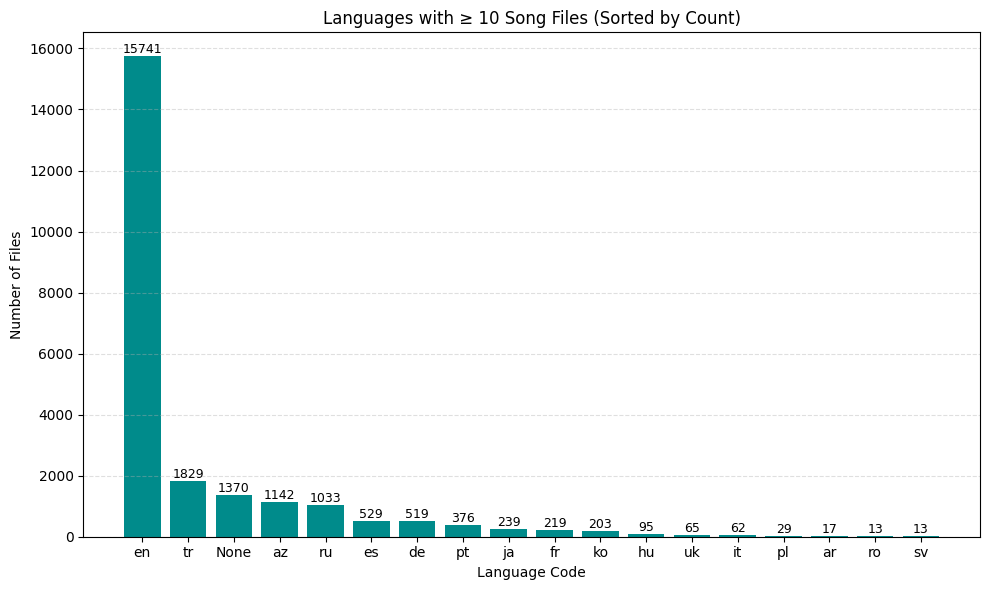

In [8]:
import json
import matplotlib.pyplot as plt
from src.utils import load_jsons_data
from env import DATA_DIR
import pandas as pd
from src.df_filters import DFFilters


LANG_THRESHOLD = 10
PATH_TO_LANGUAGE_MAPPING = 'tracks/language_mapping_trh-0.8.json' ## if you don't have this file, you should run language_mapping.py

with open(PATH_TO_LANGUAGE_MAPPING, encoding='utf-8') as f:
    filtered = ((lang, len(files)) for lang, files in json.load(f).items() if len(files) >= LANG_THRESHOLD)
    sorted_data = sorted(filtered, key=lambda x: x[1], reverse=True)

langs, counts = zip(*sorted_data)

plt.figure(figsize=(10, 6))
bars = plt.bar(langs, counts, color='darkcyan')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()),
             ha='center', va='bottom', fontsize=9)

plt.title(f'Languages with ≥ {LANG_THRESHOLD} Song Files (Sorted by Count)')
plt.xlabel('Language Code')
plt.ylabel('Number of Files')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

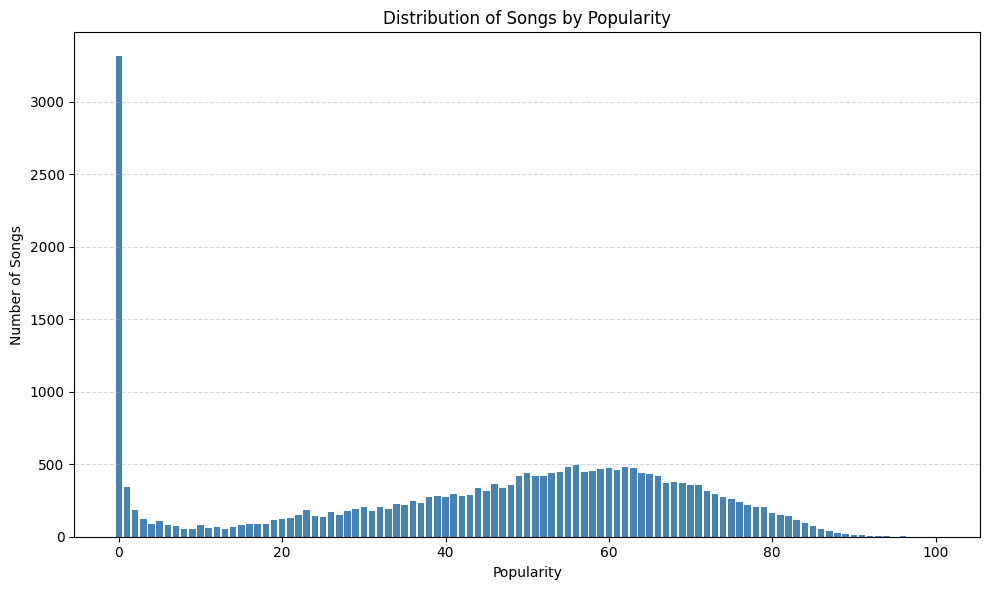

In [17]:
popularity_threshold = 0
df = load_jsons_data(DATA_DIR, ['popularity'])
df = df[df['popularity'] >= popularity_threshold]
popularity_counts = df['popularity'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(popularity_counts.index, popularity_counts.values, color='steelblue')

plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.title('Distribution of Songs by Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Smart cover: 100%|██████████| 935/935 [00:00<00:00, 1881.92it/s]


1033


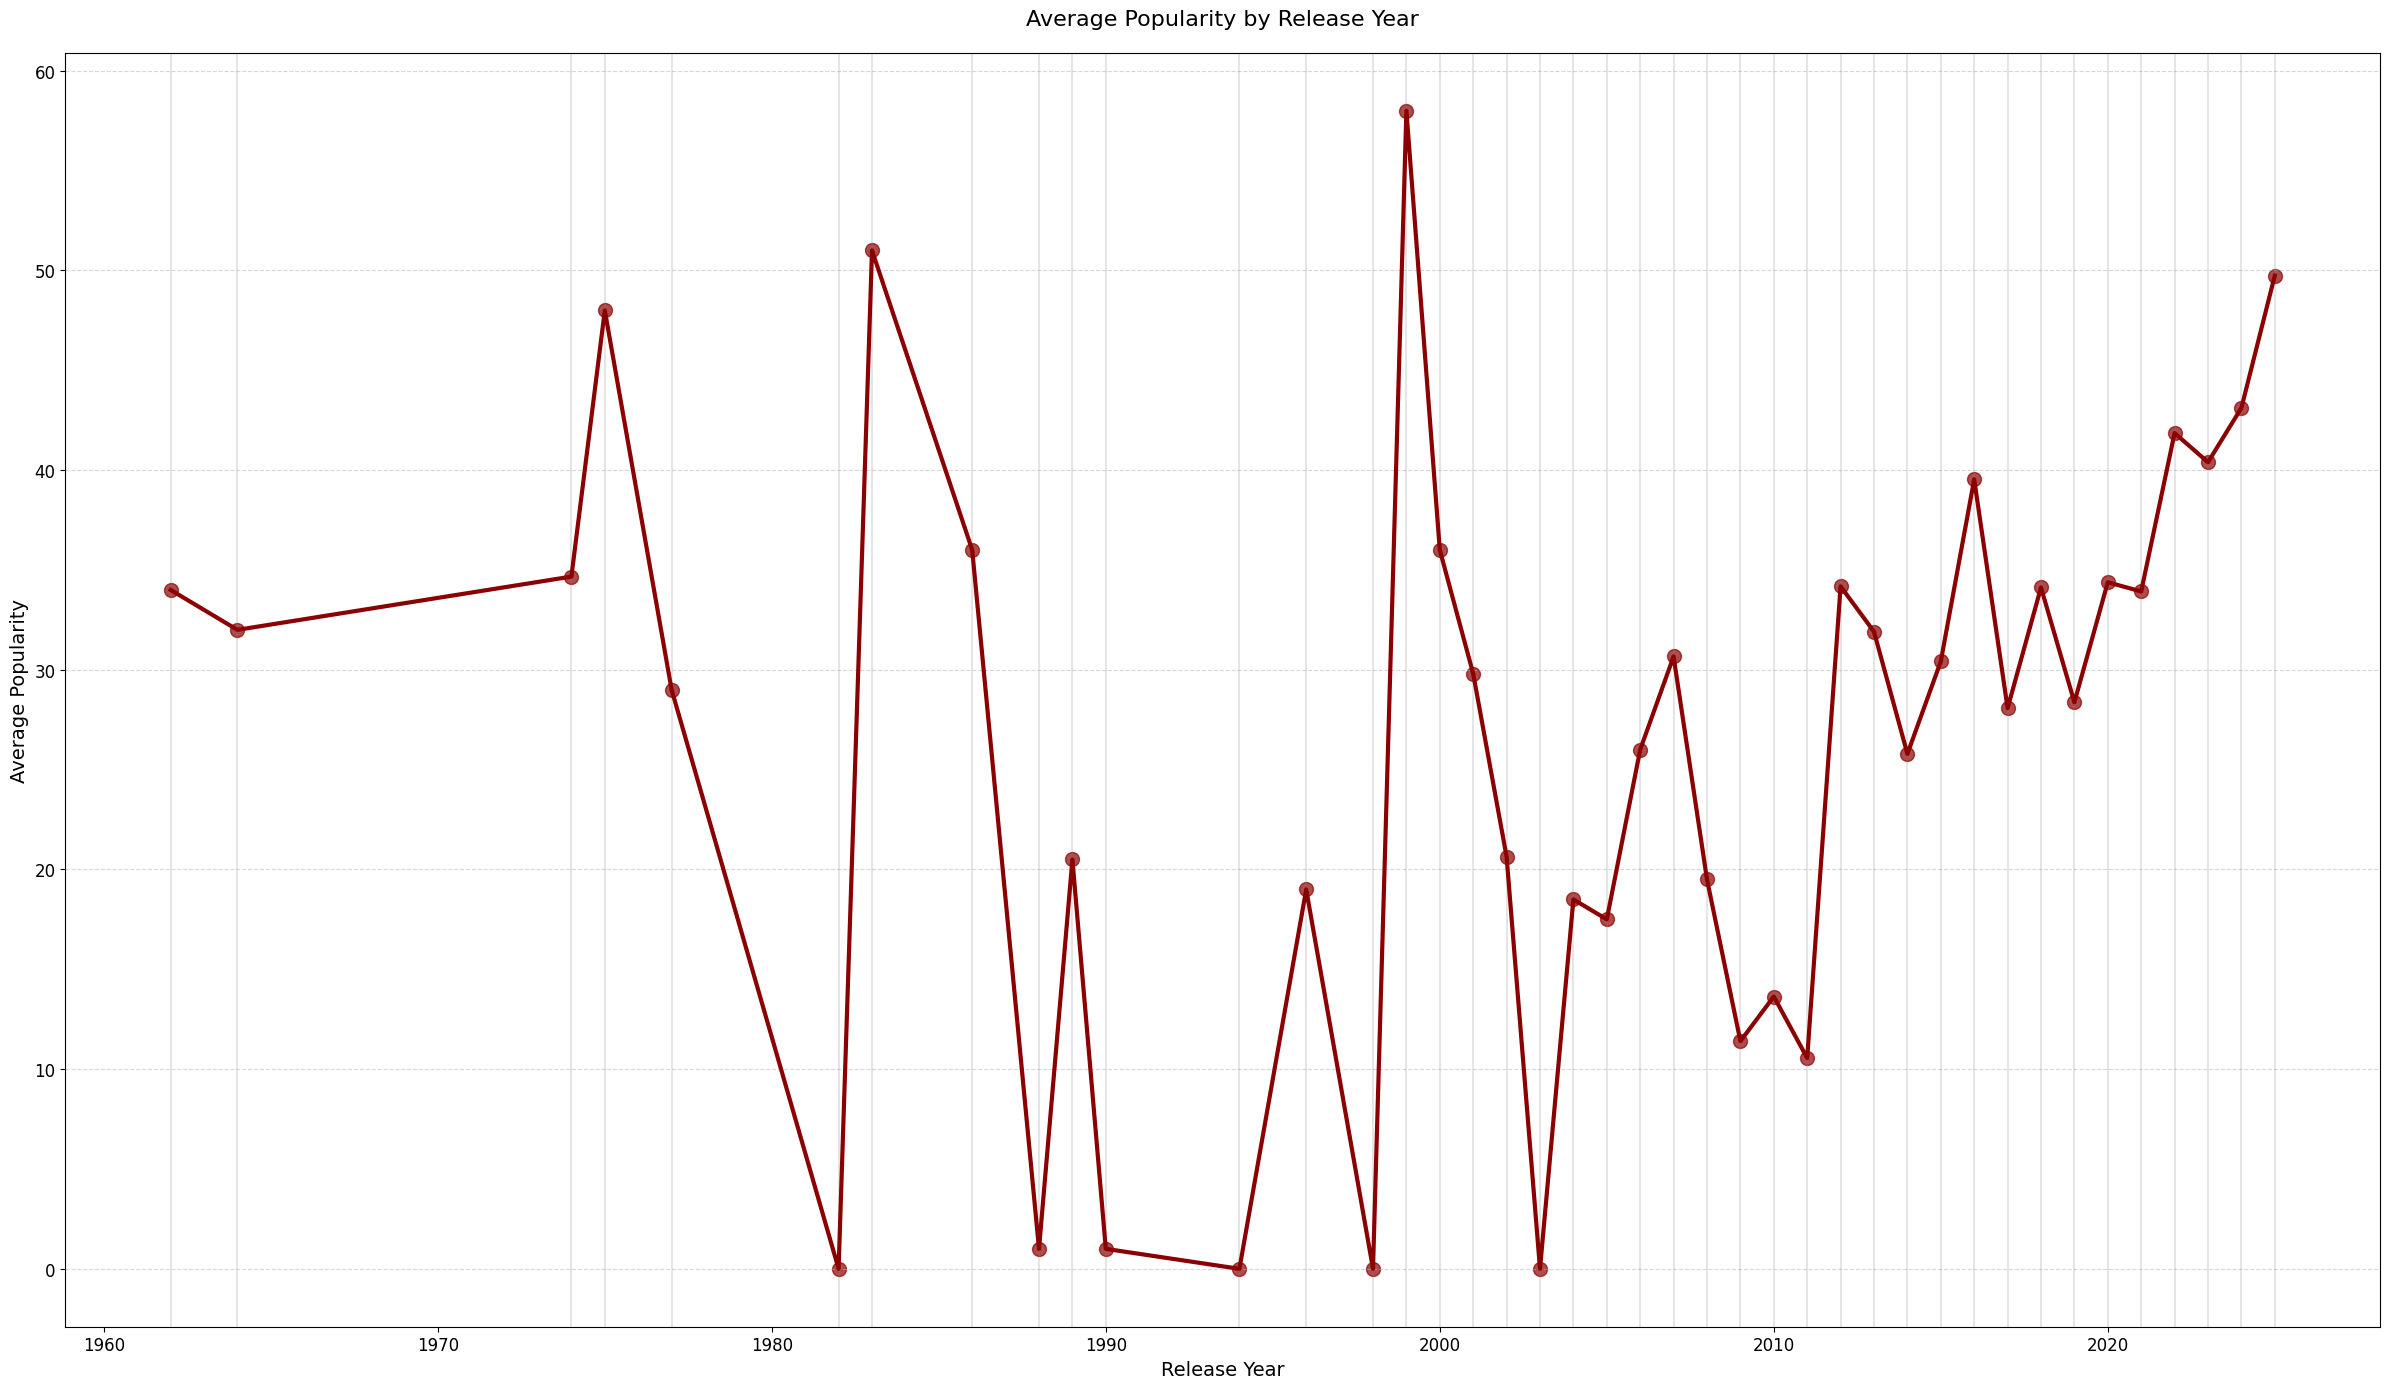

In [37]:
# Visualization of the disribution popularity by the release year
dffilter = DFFilters()
df = load_jsons_data(DATA_DIR, ['popularity', 'release_date', "track_name", "track_id"])
df = dffilter.language(df, PATH_TO_LANGUAGE_MAPPING, white_list=["ru"])
df = dffilter.release_date(df)
df = dffilter.smart_cover(df)
def strip_release_date(date: str) -> int:
    return int(date[:4])
df['year'] = df['release_date'].apply(strip_release_date)
print(len(df))

# make a one big plot to see all years
plt.figure(figsize=(24, 14))

# Calculate average popularity per year
avg_popularity = df.groupby('year')['popularity'].mean()

# Plot vertical lines for each year
for year in avg_popularity.index:
    plt.axvline(x=year, color='gray', alpha=0.2, linestyle='-')

plt.plot(avg_popularity.index, avg_popularity.values, color='darkred', linewidth=3)
plt.scatter(avg_popularity.index, avg_popularity.values, color='darkred', alpha=0.7, s=100)

plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Popularity', fontsize=14)
plt.title('Average Popularity by Release Year', fontsize=16, pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Increase tick label sizes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

In [34]:
len(df)

1033